#valorant aim ML


In [55]:
import pandas as pd
#combination of agents and ranks and various statistics
df = pd.read_csv("dataset/RankedData.csv")
#weapon statistics for main weapons (phantom/vandal) and ranks
df_weapon = pd.read_csv("dataset/WeaponData.csv")

In [56]:
df.head()

,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
0,Iron 1 Sage,0.76,10.6 / 14.0 / 5.7,0.518,0.176,160,0.114,510561,Iron 1,Sage
1,Iron 1 Raze,0.89,12.9 / 14.5 / 4.7,0.518,0.117,202,0.141,339609,Iron 1,Raze
2,Iron 1 Reyna,0.97,14.0 / 14.4 / 4.4,0.516,0.116,212,0.156,338538,Iron 1,Reyna
3,Iron 1 Jett,0.93,13.3 / 14.3 / 3.6,0.512,0.101,200,0.156,292383,Iron 1,Jett
4,Iron 1 Sova,0.78,11.1 / 14.2 / 5.0,0.511,0.075,170,0.111,217974,Iron 1,Sova


In [57]:
df[df['Win %'] == df['Win %'].max()]


,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
116,Radiant Astra,1.07,15.9 / 14.9 / 4.6,0.554,0.028,213,0.101,9384,Radiant,Astra


In [58]:
df[df['Win %'] == df['Win %'].min()]


,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
119,Radiant Breach,0.75,11.9 / 15.8 / 7.0,0.375,0.005,167,0.131,1632,Radiant,Breach


In [59]:
df[df['Pick %'] == df['Pick %'].max()]

,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
105,Radiant Jett,1.14,18.6 / 16.4 / 3.6,0.511,0.193,253,0.206,65943,Radiant,Jett


In [60]:
df[df['Pick %'] == df['Pick %'].min()]

,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
119,Radiant Breach,0.75,11.9 / 15.8 / 7.0,0.375,0.005,167,0.131,1632,Radiant,Breach


In [61]:
#subsets of silver data
silver_df = df[df['Rank'] == 'Silver 1']
silver_df.head()

,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
30,Silver 1 Sage,0.93,13.4 / 14.4 / 6.7,0.508,0.158,194,0.111,3118599,Silver 1,Sage
31,Silver 1 Reyna,1.16,17.6 / 15.2 / 4.5,0.507,0.139,255,0.159,2750226,Silver 1,Reyna
32,Silver 1 Jett,1.14,17.4 / 15.2 / 3.9,0.506,0.126,251,0.177,2491095,Silver 1,Jett
33,Silver 1 Raze,1.05,16.1 / 15.3 / 5.0,0.510,0.088,241,0.149,1732980,Silver 1,Raze
34,Silver 1 Omen,0.97,14.5 / 15.0 / 3.8,0.495,0.085,207,0.125,1690752,Silver 1,Omen


In [62]:
#creation of ML models that predict KD and Avg. Score. 
#Creating two dictionaries to quantify the rank and agent values.
rank_class_dict = {"Iron 1": 1, "Bronze 1":2, "Silver 1":3, "Gold 1": 4, "Platinum 1":5, "Diamond 1":6, "Immortal": 7, "Radiant": 8}
agent_class_dict = {"Sage":1, "Raze": 2, "Reyna": 3, "Sova":4, "Astra": 5, "Viper": 6, "Breach": 7, "Brimstone": 8, "Phoenix": 9, "Jett": 10, "Yoru": 11, "Omen": 12, "Skye": 13, "Cypher":14, "Killjoy":15}

#Mapping rank and agent dictionaries to rank and agent columns
df['Rank'] = df['Rank'].map(rank_class_dict)
df['Agent'] = df['Agent'].map(agent_class_dict)

In [63]:
df.head()

,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
0,Iron 1 Sage,0.76,10.6 / 14.0 / 5.7,0.518,0.176,160,0.114,510561,1,1
1,Iron 1 Raze,0.89,12.9 / 14.5 / 4.7,0.518,0.117,202,0.141,339609,1,2
2,Iron 1 Reyna,0.97,14.0 / 14.4 / 4.4,0.516,0.116,212,0.156,338538,1,3
3,Iron 1 Jett,0.93,13.3 / 14.3 / 3.6,0.512,0.101,200,0.156,292383,1,10
4,Iron 1 Sova,0.78,11.1 / 14.2 / 5.0,0.511,0.075,170,0.111,217974,1,4


In [65]:
import sklearn
from sklearn import svm, preprocessing
#Shuffling df cause data is sorted
df = sklearn.utils.shuffle(df)

# first ML model that predicts the Avg. Score based off various statistics 
X = df.drop(["Agent Rank",'KDA', 'Matches','Avg. Score','Agent'],axis = 1).values
X = preprocessing.scale(X)
y = df['Avg. Score'].values

test_size = 105
X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf_acs = svm.SVR(kernel="linear")

clf_acs.fit(X_train,y_train)


#Second ML model that predicts the KD based off various statistics within 
X2 = df.drop(["Agent Rank",'KDA', 'Matches','KD','Agent'],axis = 1).values
X2 = preprocessing.scale(X)
y2= df['KD'].values

test_size2 = 102
X2_train = X2[:-test_size2]
y2_train = y2[:-test_size2]

X2_test = X2[-test_size2:]
y2_test = y2[-test_size2:]

clf_kd = svm.SVR(kernel="linear")

clf_kd.fit(X2_train,y2_train)


SVR(kernel='linear')

In [66]:
clf_acs.score(X_test,y_test)

0.8477135534929724

In [67]:
for X,y in zip(X_test,y_test):
    print(f"Model: {clf_acs.predict([X])[0]}, Actual: {y}")

Model: 201.1975424880034, Actual: 194
Model: 197.02442512772637, Actual: 195
Model: 205.6264969725158, Actual: 204
Model: 170.79927368340617, Actual: 167
Model: 216.1012114521846, Actual: 206
Model: 192.8896487454575, Actual: 197
Model: 205.73411029932865, Actual: 196
Model: 198.29273387281262, Actual: 203
Model: 219.28934210858773, Actual: 234
Model: 209.02106761492064, Actual: 218
Model: 186.71231691705674, Actual: 178
Model: 206.3435132330944, Actual: 197
Model: 203.93109550864344, Actual: 207
Model: 202.10217493237803, Actual: 193
Model: 221.6439464781797, Actual: 213
Model: 201.72592032016038, Actual: 202
Model: 176.67025670969608, Actual: 170
Model: 180.72531535358252, Actual: 171
Model: 199.40357667431869, Actual: 198
Model: 187.49197145306863, Actual: 191
Model: 210.98538322296622, Actual: 228
Model: 206.59843369571726, Actual: 200
Model: 234.61739029606287, Actual: 249
Model: 219.412718240766, Actual: 228
Model: 198.41897187794626, Actual: 207
Model: 190.22405897041267, Actual

In [68]:
clf_kd.score(X2_test,y2_test)

0.6004384699757176

In [71]:
for X2,y2 in zip(X2_test,y2_test):
    print(f"Model: {clf_kd.predict([X2])[0]}, Actual: {y2}")

Model: 0.9401718794389544, Actual: 0.75
Model: 0.9886057015391644, Actual: 1.01
Model: 0.9405947899352994, Actual: 0.92
Model: 0.9472144329665211, Actual: 0.95
Model: 0.9471169552378376, Actual: 0.96
Model: 0.9930412680491206, Actual: 1.06
Model: 0.9639204080176891, Actual: 0.99
Model: 0.9022127439300547, Actual: 0.84
Model: 0.9540500997323905, Actual: 0.95
Model: 0.9505135720451011, Actual: 0.97
Model: 0.9327063473393662, Actual: 0.93
Model: 1.0123821249739844, Actual: 1.07
Model: 0.9622523737851296, Actual: 0.97
Model: 0.8755807694298618, Actual: 0.78
Model: 0.892864229181293, Actual: 0.77
Model: 0.9616016428660801, Actual: 0.96
Model: 0.9566406225924023, Actual: 0.87
Model: 0.9549412024103465, Actual: 0.99
Model: 0.9803378906490312, Actual: 0.98
Model: 1.0119170676367302, Actual: 1.13
Model: 1.0161301094720698, Actual: 1.02
Model: 0.9907454795975204, Actual: 0.92
Model: 0.953261820420178, Actual: 0.89
Model: 0.9644459979302363, Actual: 0.96
Model: 0.9590894416571049, Actual: 0.99
Mo

<AxesSubplot:xlabel='Rank Weapon'>

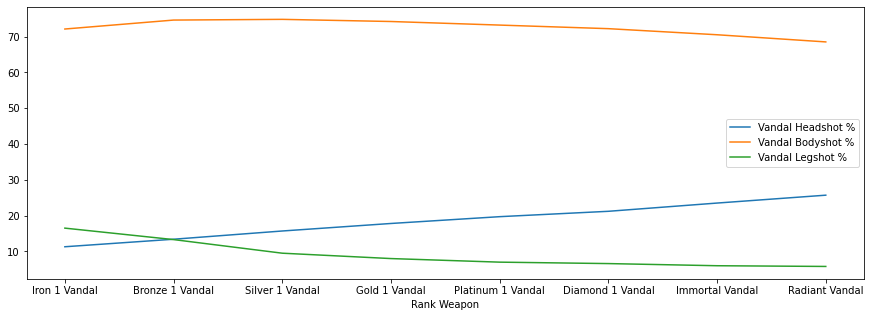

In [ ]:
#Creating a subset of weapon dataframe that isolates the vandal weapon
vandal  = df_weapon[df_weapon["Weapon"] == "Vandal"]
vandal = vandal.set_index("Rank Weapon")
#Plotting Headshot, Bodyshot, and legshot % for the vandal at all ranks
vandal["Headshot %"].plot(figsize=(15,5), label = "Vandal Headshot %", legend = True)
vandal["Bodyshot %"].plot(figsize=(15,5), label = "Vandal Bodyshot %", legend = True)
vandal["Legshot %"].plot(figsize=(15,5), label = "Vandal Legshot %", legend = True)
